In [2]:
%matplotlib inline

import seaborn as sns
import datetime as dt

from scipy import stats

sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.corpus import stopwords

In [4]:
# Import data from CSV file and save in dataframe df

df = pd.read_csv(r"C:\Users\Adi\Desktop\Data_Science\Capstone1\DataSet_DataStory.csv")

In [5]:
df['result'] = (df.state == 'successful').astype(int)


In [75]:
df = df[['name', 'result']]
df.head()

TypeError: list indices must be integers or slices, not list

In [7]:
# Bag of words
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.name.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.name)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:100])


There are 95155 tokens
['0', '00', '000', '000001', '00001', '0001', '000bp', '000km', '000mah', '001', '002', '003', '004', '005', '00tz', '01', '014352', '016', '02', '03', '030412', '04', '04y', '05', '054', '056', '06', '0625c', '068', '07', '08', '081', '086', '089', '09', '0blio', '0c370t', '0ct', '0f', '0gravity', '0h', '0kw', '0l', '0m', '0ne', '0x', '1', '10', '100', '1000', '10000', '100000', '1000000', '10000mah', '1000km', '1000mortel', '1000s', '1000timesyes', '1000v', '1000w', '1001', '10036', '100bracelets100days', '100cities', '100daysians', '100faces', '100giftcreations', '100k', '100lb', '100lbs', '100ma', '100pact', '100pg', '100s', '100shirts', '100th', '100yr', '101', '1017', '1018', '10197', '102', '10218', '10224', '10232', '1024', '10243', '10246', '10247', '10249', '10251', '10256', '103', '1031', '104', '1049', '105', '106', '1067', '107']


In [8]:
# Import Pipeline
from sklearn.pipeline import Pipeline

In [9]:
from sklearn.model_selection import train_test_split

# Train test split
X = df.name.str.lower()
y = df.result




### Use this pipeline and other techniques from datacamp in final modeling of Capstone1


In [10]:
# This pipeline method maybe used in full capstone1

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, stratify=y)

# Instantiate Pipeline object: pl
pl = Pipeline([('vec', CountVectorizer()), ('clf', LogisticRegression())])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on test data: ", accuracy)



Accuracy on test data:  0.6616055061736935


In [11]:
# Back to learning NLP
# Convert whole X into cv
cv = CountVectorizer()
X_cv = cv.fit_transform(X)

# Train test split
X_traincv, X_testcv, y_train, y_test = train_test_split(X_cv, y, random_state=12, stratify=y)


In [12]:
X_traincv.shape

(260216, 140658)

In [13]:
logreg = LogisticRegression()
logreg.fit(X_traincv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
logreg.score(X_testcv, y_test) # really bad accuracy as countvector took all words

0.6615709196555183

In [15]:
# TFIDF is a better method as it offsets a word if it occurs in most documents

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=1, stop_words='english')

# Convert whole X into cv
X_tv = tv.fit_transform(X)

# Train test split
X_traintv, X_testtv, y_train, y_test = train_test_split(X_tv, y, random_state=12, stratify=y)

In [16]:
X_traintv.shape

(260216, 140363)

In [17]:
logreg = LogisticRegression()
logreg.fit(X_traintv, y_train)
logreg.score(X_testtv, y_test) # really bad accuracy as countvector took all words

0.661144352598024

In [18]:
# Naive Bayes for prediction

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [19]:
# Make sure target variable is integer type for NB
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [20]:
mnb.fit(X_traintv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
prediction = mnb.predict(X_testtv)

In [22]:
count= 0
for i in range(len(prediction)):
    if prediction[i] == np.array(y_test)[i]:
        count += 1
count/len(prediction)

0.6516445889392315

In [23]:
# The models are pretty bad. This is because we tokenized words as regex alphanumeric
# Let's use NLTK to tokenize important words and then run model

from nltk.tokenize import sent_tokenize, word_tokenize
df['tokens'] = df.name.str.lower().apply(word_tokenize)

In [24]:
# Take small sample from df to save processing time

data = df#.head(100)

In [25]:
# Stop words for tokens

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [26]:
data['filtered'] = data['tokens'].apply(lambda x: [w for w in x if w not in stop_words])

In [27]:
# Stemming - conver happiness, happy to happ
# This may not be important for cap1, doing for learning purposes

from nltk.stem import PorterStemmer

In [28]:
ps = PorterStemmer()
#data['stem'] = data['filtered'].apply(lambda x: [ps.stem(w) for w in x])

In [29]:
# Lets use new tokenizer which is unsupervized and comes pre trained. It can be trained as desired too

from nltk.tokenize import PunktSentenceTokenizer

In [30]:
# Punkt tokenizer will not work for this problem. It creates too many custom tokens
# It is better for full text instead of titles where it can tag words to noun, verb, etc.

# refer to this youtube video
# https://www.youtube.com/watch?v=6j6M2MtEqi8&index=4&list=PLQVvvaa0QuDf2JswnfiGkliBInZnIC4HL

In [31]:
# Better to convert all text to lower case
# Remove punctuation
# Remove digits

import string

data.name = data.name.apply(lambda x: x.lower())
punct = set(string.punctuation)
data['filtered'] = data['filtered'].apply(lambda x: [w for w in x if w not in punct])

digits = set(string.digits)
data['filtered'] = data['filtered'].apply(lambda x: [w for w in x if w not in digits])

In [32]:
# name
# token = name tokenized as list of words
# filered = tokens without stop words + punctuation removed + digits removed

data[['name', 'tokens', 'filtered']].head()

,name,tokens,filtered
0,the songs of adelaide & abullah,"[the, songs, of, adelaide, &, abullah]","[songs, adelaide, abullah]"
1,greeting from earth: zgac arts capsule for et,"[greeting, from, earth, :, zgac, arts, capsule...","[greeting, earth, zgac, arts, capsule, et]"
2,where is hank?,"[where, is, hank, ?]",[hank]
3,toshicapital rekordz needs help to complete album,"[toshicapital, rekordz, needs, help, to, compl...","[toshicapital, rekordz, needs, help, complete,..."
4,community film project: the art of neighborhoo...,"[community, film, project, :, the, art, of, ne...","[community, film, project, art, neighborhood, ..."


In [33]:
# Improve tokenization
# Count vectorization is a bag of words technique
# Hash vector is better because it reduced the dimensionality of super sparse matrix and speeds up computation
# Remeber this is performed on original name column as tokenizer will convert it into tokens with low dimension
# Cannot be used on filtered column because its already a list of tokens

# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(data.name)

# Create DataFrame and print the head
hashed_data = pd.DataFrame(hashed_text.data)
print(hashed_data.head())

          0
0  0.500000
1 -0.500000
2 -0.500000
3  0.500000
4  0.408248


In [34]:
# Punkt Tokenizer

from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw('2005-GWBush.txt')
sample_text = state_union.raw('2006-GWBush.txt')

trained_tokenizer = PunktSentenceTokenizer(train_text)
tokenized = trained_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized[:5]:
            words = word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)

    except Exception as e:
        print(str(e))


In [35]:
process_content()

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('THE', 'NNP'), ('PRESIDENT', 'NNP'), (':', ':'), ('Thank', 'NNP'), ('you', 'PRP'), ('all', 'DT'), ('.', '.')]
[('Mr.', 'NNP'), ('Speaker', 'NNP'), (',', ','), ('Vice', 'NNP'), ('President', 'NNP'), ('Cheney', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('Congress', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('and', 'CC'), ('diplomatic', 'JJ'), ('corps', 'NN'), (',', ','), ('distinguished', 'JJ'), ('guests', 'NNS'), (',', ','), ('and', 'CC'), ('fellow', 'JJ'), ('citizens', 'NNS'), (':', ':'), ('Today', 'VB'), ('our', 'PRP$'), ('nat

In [36]:
# Chunking 
# Making sense of text by grouping in noun, phrases etc.
# Chunk gram is verb , noun, adverb, etc.
def process_content():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            print(chunked)
            chunked.draw()

    except Exception as e:
        print(str(e))

#process_content()
# Chinking - learn later


In [37]:
data['filter'] = data['filtered'].apply(lambda x: ' '.join(map(str, x)))
#data[['name', 'filter', 'result']]

In [63]:
# Run model on filtered data - cap1

X = data['filter']
y = data['result'].values


In [64]:
# TFIDF is a better method as it offsets a word if it occurs in most documents

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=1, stop_words='english')

# Convert whole X into cv
X_v = tv.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_v, y, random_state=12, stratify=y)

X_v.shape

(346955, 140343)

In [65]:
y.shape

(346955,)

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test) # this accuracy is for data i.e. 100 rows of df. check for all data

0.6609598911677561

In [41]:
# Select model
nb = MultinomialNB()

# Fit training data
nb.fit(X_train, y_train)

# Check training accuracy
print('Accuracy on training set ' + str(nb.score(X_train, y_train)))

# Predict on test data
prediction = nb.predict(X_test)

# Check test accuracy
print('Accuracy on test set ' + str(nb.score(X_test, y_test)))

Accuracy on training set 0.740238878470194
Accuracy on test set 0.6515869447422727


c:\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'CDF')

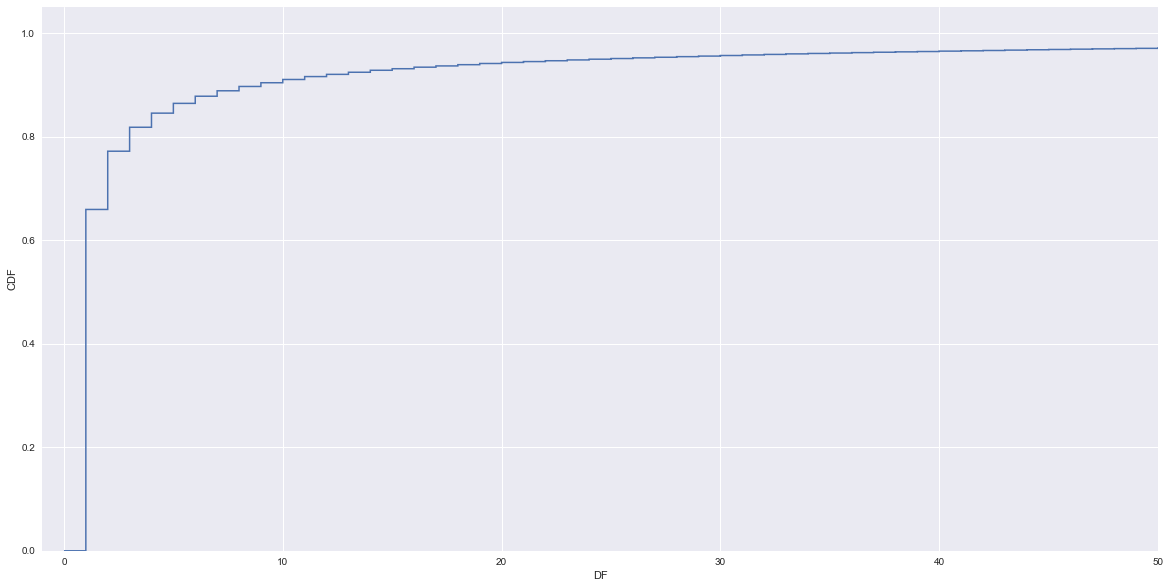

In [42]:
# X is a matrix with rows as documents and columns as words. Each entry is 0 or 1 if that words exists in the document or not
# Sum each column to collapse in one row which is total number of a given word, sort this list for CDF
fig, ax = plt.subplots(figsize=(20, 10))
df = list((X_v > 0).sum(0).tolist()[0])
c = pd.Series(df)
y = np.arange(c.sum())
plt.hist(c, y, normed=True, histtype='step', cumulative=True, linewidth=1.5)

plt.xlim(-1, 50)
plt.xlabel("DF")
plt.ylabel("CDF")

In [43]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += scorefunc(X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    failed = y == 0
    successful = ~failed
    return prob[failed, 0].sum() + prob[successful, 1].sum()

In [44]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(X_v.shape[0]), train_size=0.7)
mask = np.zeros(X_v.shape[0], dtype=np.bool)
mask[itest] = True

c:\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [59]:
#y = y.reshape(-1, 1)

In [152]:
import re
from nltk.tokenize import TreebankWordTokenizer

In [153]:
from sklearn.naive_bayes import MultinomialNB

#the grid of parameters to search over

alphas = [0.1, 0.5, 1, 5]
min_df = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30] # YOUR TURN: put your value of min_df here.

#Find the best value for alpha and min_df, and the best classifier
best_min_df = None
best_alpha = None
maxscore = -np.inf
score = None

#for min_df in min_df:
for alpha in alphas:        
        
        # Create the token pattern: TOKENS_ALPHANUMERIC
        #TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 
        
        TOKENS_ALPHANUMERIC = '[^\d\W\_\-\:\;\!\@\#\%\&\*\?]+' 
        #vectorizer = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1,2))
        
        vectorizer = CountVectorizer(ngram_range=(1,1), stop_words=None,
                             tokenizer=TreebankWordTokenizer().tokenize)
        
        # Convert whole X into cv
        X_v = vectorizer.fit_transform(X)

        Xtrainthis = X_v[mask]
        ytrainthis = y[mask]
    
        # your turn
        clf = MultinomialNB(alpha=alpha)
        
        score = cv_score(clf, Xtrainthis, ytrainthis, clf.score)
        
        if score > maxscore:
            
            maxscore = score
            best_alpha = alpha
            best_min_df = min_df
            
print('CV score:', maxscore)
print('aplha:', best_alpha)
print('min_df:', best_min_df)

CV score: 0.6517624710654314
aplha: 1
min_df: [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]


In [154]:
vectorizer = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1,2))
# Convert whole X into cv
X_v = vectorizer.fit_transform(X)
xtrain=X_v[mask]
ytrain=y[mask]
xtest=X_v[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.926619
Accuracy on test data:     0.659066


In [155]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, clf.predict(xtest)))

[[129035  21396]
 [ 61406  31031]]


In [156]:
from sklearn.metrics import precision_recall_fscore_support

cm = confusion_matrix(ytest, clf.predict(xtest))
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Precision: {:2f}".format(precision))
print("Recall: {:2f}".format(recall))

Precision: 0.591890
Recall: 0.335699


In [157]:
words = np.array(vectorizer.get_feature_names())
words

array(['a', 'a a', 'a ack', ..., 'žít may', 'ƒ', 'ƒ å'], dtype='<U60')